# Real Estate Aquisition Advisor V.2

The Real Estate Aquisition Advisor V.2 is a comprehensive tool that offers a multifaceted approach to assist users in making informed investment decisions. It encompasses various crucial aspects of real estate investment, starting from data retrieval and cleaning, all the way to machine learning-driven rent prediction models and in-depth financial analysis. This tool leverages web scraping to gather property listings from popular platforms like Redfin and Zillow, ensuring access to up-to-date and relevant data. It also provides user inputs for interactive cash flow projection and visualization, allowing users to evaluate the cash flow potential of different properties based on their downpayment preferences and location-specific rental comparables. Furthermore, it incorporates machine learning models to predict property rents, taking into account property square footage, which adds an extra layer of accuracy to rent projections. Finally, it goes beyond the basics by offering extensive financial insights, including property value projections, MOIC calculations, neighborhood analytics, and property value trends by zip code. Overall, this tool equips users with a holistic toolkit to make well-informed real estate investment decisions.

In [36]:
#MUST BE RAN
import numpy as np
import scipy as sp
import os
import pandas as pd
import glob
import os.path
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.image as mpimg
import seaborn as sns                       # pandas for data management
import geopandas                            # geopandas for maps work
from shapely.geometry import Point # shapely handles the coordinate references for plotting shapes
from cartopy import crs as ccrss
import contextily as ctx
import folium
import pyproj
from shapely.geometry import shape
import numpy_financial as npf
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import itertools
import time
import statsmodels.api as sm
from PIL import Image


#main computer
os.chdir(r"C:\Users\Administrator\Dropbox\Apps\ScrapeHero-Cloud") #main computer


# Data Retrieval, Cleaning, and Preparations

In the following Python code blocks, a series of essential tasks are performed, encompassing data retrieval, cleaning, and preparation. Initially, data is automatically obtained through web scraping and stored in a Dropbox folder for ease of access. Subsequently, the data is read into dataframes and undergoes necessary cleaning and formatting. The integration with Dropbox enables seamless data usage across various computers. The dataset consists of property listings from Redfin and Zillow, encompassing properties for sale on both platforms and Zillow rentals. For expense calculations there is a primary focus on Redfin data due to its proven accuracy in expense projections. Monthly expenses are categorized into 5% and 20% downpayment scenarios to account for the significant impact of PMI on margins, a crucial consideration for later analyses.

In [37]:
#MUST BE RAN
#REDFIN BUY SCRAPE
#Grabs most recent uploaded file
#Scraper 1
folder_path3 = r'C:\Users\Administrator\Dropbox\Apps\ScrapeHero-Cloud\RedfinBuyScrape'
file_type3 = r'\*csv'
files3 = glob.glob(folder_path3 + file_type3)
max_file3 = max(files3, key=os.path.getctime)

#Scraper2
folder_path31 = r'C:\Users\Administrator\Dropbox\Apps\ScrapeHero-Cloud\RedfinBuyScrape2'
file_type31 = r'\*csv'
files31 = glob.glob(folder_path31 + file_type31)
max_file31 = max(files31, key=os.path.getctime)

#Cleaning data
RedfinBuyScrape1 = pd.read_csv(max_file3)
RedfinBuyScrape2 = pd.read_csv(max_file31)
RedfinBuyScrape = pd.concat([RedfinBuyScrape1, RedfinBuyScrape2], ignore_index=True)
del RedfinBuyScrape['rank']
del RedfinBuyScrape['property_id']
del RedfinBuyScrape['currency']
del RedfinBuyScrape['land_area_sqft']
del RedfinBuyScrape['property_type']
del RedfinBuyScrape['property_style']
del RedfinBuyScrape['sold_date']
del RedfinBuyScrape['listing_agent_name']
del RedfinBuyScrape['listing_broker_name']
del RedfinBuyScrape['other_agents']
del RedfinBuyScrape['image_urls']
del RedfinBuyScrape['year_built']
del RedfinBuyScrape['status']
del RedfinBuyScrape['mls_number']
del RedfinBuyScrape['input_url']
del RedfinBuyScrape['description']
del RedfinBuyScrape['listing_page_url']
del RedfinBuyScrape['redfin_estimate']
#Adjusts mortgage cost to estimate for .05 down rather than .2
RedfinBuyScrape['estimate_mortgage'] = RedfinBuyScrape['estimate_mortgage'] + (RedfinBuyScrape['price']*.0015388)
RedfinBuyScrape['bedrooms'] = RedfinBuyScrape['bedrooms'].astype('float64')





print(RedfinBuyScrape)
RedfinBuyScrape.dtypes

                                          address   latitude  longitude  \
0     208 W Washington St #709, Chicago, IL 60606  41.883391 -87.634297   
1       500 W Superior St #801, Chicago, IL 60654  41.895951 -87.642196   
2        400 W Ontario St #505, Chicago, IL 60654  41.893401 -87.638723   
3      333 N Jefferson St #303, Chicago, IL 60661  41.887826 -87.642396   
4      500 W Superior St #1411, Chicago, IL 60654  41.895951 -87.642196   
..                                            ...        ...        ...   
67       834 N Wood St Unit 3S, Chicago, IL 60622  41.897055 -87.672342   
68  714 W Evergreen Ave Unit A, Chicago, IL 60610  41.906571 -87.646763   
69     21 W Goethe St Unit 8DE, Chicago, IL 60610  41.905459 -87.629626   
70  1009 N Oakley Blvd Unit 1W, Chicago, IL 60622  41.899736 -87.684377   
71      401 E Ontario St #1609, Chicago, IL 60611  41.893211 -87.616401   

     price  bedrooms  bathrooms  area_sqft  estimate_mortgage days_on_market  \
0   319000       2.

address               object
latitude             float64
longitude            float64
price                  int64
bedrooms             float64
bathrooms            float64
area_sqft            float64
estimate_mortgage    float64
days_on_market        object
property_url          object
dtype: object

In [38]:
#MUST BE RAN
#ZILLOW RENT SCRAPE
#Grabs most recent uploaded file
#Scaper1
folder_path2 = r'C:\Users\Administrator\Dropbox\Apps\ScrapeHero-Cloud\ZillowRentScrape'
file_type2 = r'\*csv'
files2 = glob.glob(folder_path2 + file_type2)
max_file2 = max(files2, key=os.path.getctime)

#Scraper2
folder_path21 = r'C:\Users\Administrator\Dropbox\Apps\ScrapeHero-Cloud\ZillowRentScrape2'
file_type21 = r'\*csv'
files21 = glob.glob(folder_path21 + file_type21)
max_file21 = max(files21, key=os.path.getctime)

#cleaning data
ZillowRentScrape1 = pd.read_csv(max_file2)
ZillowRentScrape2 = pd.read_csv(max_file21)
ZillowRentScrape = pd.concat([ZillowRentScrape1, ZillowRentScrape2], ignore_index=True)
del ZillowRentScrape['rank']
del ZillowRentScrape['property_id']
del ZillowRentScrape['broker_name']
del ZillowRentScrape['input']
del ZillowRentScrape['listing_url']
del ZillowRentScrape['listing_type']
del ZillowRentScrape['image']
del ZillowRentScrape['zestimate']
del ZillowRentScrape['rent_zestimate']
del ZillowRentScrape['days_on_zillow']
del ZillowRentScrape['sold_date']
del ZillowRentScrape['currency']
del ZillowRentScrape['land_area']
del ZillowRentScrape['is_zillow_owned']
#FOR ML PORTION################################
#ZillowRentScrape['area'] = ZillowRentScrape['area'].str.replace('sqft', '')
#ZillowRentScrape['area'] = ZillowRentScrape['area'].astype('float64')
#ZillowRentScrape['area'].fillna(ZillowRentScrape['area'].mean(), inplace=True)
###################################################
ZillowRentScrape['price'] = ZillowRentScrape['price'].str.replace('+', '.0')
ZillowRentScrape['price'] = ZillowRentScrape['price'].str.replace(',', '')
ZillowRentScrape['price'] = ZillowRentScrape['price'].astype('float64')


print(ZillowRentScrape)
ZillowRentScrape.dtypes

                                             address   latitude  longitude  \
0      653 N Kingsbury St APT 801, Chicago, IL 60654  41.893540  -87.64122   
1                        637 N Wells St, Chicago, IL  41.893540  -87.63389   
2        333 W Hubbard St APT 808, Chicago, IL 60654  41.889545  -87.63613   
3           363 W Grand Ave #1405, Chicago, IL 60654  41.891544  -87.63786   
4                     320 W Illinois St, Chicago, IL  41.890926  -87.63665   
...                                              ...        ...        ...   
1030       940 N Damen Ave APT 3R, Chicago, IL 60622  41.898987  -87.67745   
1031  847 N Winchester Ave APT 2F, Chicago, IL 60622  41.897280  -87.67552   
1032           1535 N Rockwell St, Chicago, IL 60622  41.908836  -87.69176   
1033               2541 N Southport Ave, Chicago, IL  41.928260  -87.66307   
1034       1244 W Schubert Ave #2, Chicago, IL 60614  41.930870  -87.66038   

       price  bathrooms  bedrooms         area  \
0     3600.0 

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15384\2363355487.py:39: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ZillowRentScrape['price'] = ZillowRentScrape['price'].str.replace('+', '.0')


address          object
latitude        float64
longitude       float64
price           float64
bathrooms       float64
bedrooms        float64
area             object
property_url     object
dtype: object

In [39]:
#MUST BE RAN
#ZILLOW BUY SCRAPE
#grabs most recently uploaded file
folder_path1 = r'C:\Users\Administrator\Dropbox\Apps\ScrapeHero-Cloud\ZillowBuyScrape'
file_type1 = r'\*csv'
files1 = glob.glob(folder_path1 + file_type1)
max_file1 = max(files1, key=os.path.getctime)

#Scraper2
folder_path11 = r'C:\Users\Administrator\Dropbox\Apps\ScrapeHero-Cloud\ZillowBuyScrape2'
file_type11 = r'\*csv'
files11 = glob.glob(folder_path11 + file_type11)
max_file11 = max(files11, key=os.path.getctime)

#Cleaning data
ZillowBuyScrape1 = pd.read_csv(max_file1) 
ZillowBuyScrape2 = pd.read_csv(max_file11) 
ZillowBuyScrape = pd.concat([ZillowBuyScrape1, ZillowBuyScrape2], ignore_index=True)
del ZillowBuyScrape['rank']
del ZillowBuyScrape['property_id']
del ZillowBuyScrape['broker_name']
del ZillowBuyScrape['input']
del ZillowBuyScrape['listing_url']
del ZillowBuyScrape['listing_type']
del ZillowBuyScrape['image']
del ZillowBuyScrape['zestimate']
del ZillowBuyScrape['rent_zestimate']
del ZillowBuyScrape['days_on_zillow']
del ZillowBuyScrape['sold_date']
del ZillowBuyScrape['currency']
del ZillowBuyScrape['land_area']
del ZillowBuyScrape['is_zillow_owned']
ZillowBuyScrape['address'] = ZillowBuyScrape['address'].str.replace('APT ', '#').str.replace('UNIT ', '#')
print(ZillowBuyScrape)

                                          address   latitude  longitude  \
0        200 W Grand Ave #1804, Chicago, IL 60654  41.892040 -87.634476   
1      700 N Larrabee St #1715, Chicago, IL 60654  41.894608 -87.643090   
2    208 W Washington St #1510, Chicago, IL 60606  41.883335 -87.634190   
3     330 S Michigan Ave #1809, Chicago, IL 60604  41.877884 -87.624410   
4      333 N Jefferson St #303, Chicago, IL 60661  41.887800 -87.642410   
..                                            ...        ...        ...   
118  1735 W Diversey Pkwy #311, Chicago, IL 60614  41.931890 -87.672690   
119           1881 N Poe St #I, Chicago, IL 60614  41.916195 -87.654140   
120  1212 N Lake Shore Dr #8CN, Chicago, IL 60610  41.904552 -87.625496   
121     714 W Evergreen Ave #A, Chicago, IL 60610  41.907238 -87.647660   
122     849 N Franklin St #404, Chicago, IL 60610  41.897804 -87.635430   

        price  bathrooms  bedrooms         area  \
0    435000.0        2.0       2.0  1127.0 sqft 

# Investment Cash Flow Calculation Functions

The following two code blocks represent essential functions in the calculation of investment cash flows. These functions are specifically designed to retrieve the average and minimum comparable rent prices for rental listings closest to a specified property for sale, as determined by user input.

To accomplish this, the functions take into account latitude, longitude, and the number of bedrooms to filter rental listings that match the specified bedroom count and then sort them based on proximity. The user can define the comp_amount parameter, which determines how many of the closest rental listings they want to consider in their cash flow calculations. This flexibility is crucial because different areas may have varying densities of rental properties, allowing for accurate and location-specific cash flow assessments.

In [40]:
#BEST MODEL
def AvgCompPrice( latitude, longitude, bedrooms, comp_amount): 
        df = ZillowRentScrape
        #deletes all non matching beds with only props that have equal beds
        df = df.loc[df["bedrooms"] == bedrooms ]
        #assigns column that messures difference between lat & long and adds them
        df['DistanceMessure'] = np.sqrt((df['latitude'] - latitude)**2 + (df['longitude'] - longitude)**2)
        #sorts values by Distance messures
        df = df.sort_values(by=['DistanceMessure'], ascending=True)
        #grabs given amount of values which are closest comps
        Comps = df['price'].head(comp_amount)
        #averages price of comps
        CompAvg = Comps.mean()
     
        #print (df)
        #print(Comps)
        #print(CompAvg)
        return (CompAvg)

In [41]:
#BEST MODEL
def MinCompPrice(latitude, longitude, bedrooms, comp_amount):
        df = ZillowRentScrape
        #deletes all non matching beds with only props that have equal beds
        df = df.loc[df["bedrooms"] == bedrooms ]
        #assigns column that messures difference between lat & long and adds them
        df['DistanceMessure'] = np.sqrt((df['latitude'] - latitude)**2 + (df['longitude'] - longitude)**2)
        #sorts values by Distance messures
        df = df.sort_values(by=['DistanceMessure'], ascending=True)
        #grabs given amount of values which are closest comps
        Comps = df['price'].head(comp_amount)
        #min price of comps
        CompLow = Comps.min()
     
        #print (df)
        #print(Comps)
        #print(CompLow)
        return (CompLow)

# Website-Based Rental Coordinates Selection

The code block below introduces an additional feature that offers users the flexibility to choose the source website for obtaining longitude and latitude coordinates for rental listings. These coordinates can slightly vary between websites like Zillow and Redfin, and neither platform has demonstrated consistent superiority in accuracy. This capability empowers users to select the most suitable website for their specific needs, ensuring precision in geographic data retrieval.

In [42]:
#MUST BE RAN
#MERGE FILE FOR USING ZILLOW LAT/LONG COMP CALC
Merge1 = RedfinBuyScrape[["address", "estimate_mortgage"]].copy()
print(Merge1)
print (ZillowBuyScrape)
Merged = pd.merge(ZillowBuyScrape,Merge1 ,on='address',how='inner')
Merged.rename(columns={'area': 'area_sqft'}, inplace=True)
Merged['area_sqft'] = Merged['area_sqft'].str.replace(' sqft', '').astype(float)


print(Merged)

                                          address  estimate_mortgage
0     208 W Washington St #709, Chicago, IL 60606         3220.87720
1       500 W Superior St #801, Chicago, IL 60654         6188.72800
2        400 W Ontario St #505, Chicago, IL 60654         3906.89612
3      333 N Jefferson St #303, Chicago, IL 60661         4715.08520
4      500 W Superior St #1411, Chicago, IL 60654         5744.34000
..                                            ...                ...
67       834 N Wood St Unit 3S, Chicago, IL 60622         3788.75412
68  714 W Evergreen Ave Unit A, Chicago, IL 60610         4452.93000
69     21 W Goethe St Unit 8DE, Chicago, IL 60610         4542.59012
70  1009 N Oakley Blvd Unit 1W, Chicago, IL 60622         2652.86400
71      401 E Ontario St #1609, Chicago, IL 60611         4926.99000

[72 rows x 2 columns]
                                          address   latitude  longitude  \
0        200 W Grand Ave #1804, Chicago, IL 60654  41.892040 -87.634476   

# User-Interactive Cash Flow Projection and Visualization

This block facilitates user interaction by collecting essential inputs, including the number of rental comparables to consider in cash flow projections, the preferred coordinates source, and the number of properties to be graphed. Subsequently, it generates informative horizontal bar graphs that offer insights into the highest cash-flowing properties for both 5% and 20% downpayment scenarios. These visualizations empower users to make informed investment decisions by highlighting properties with the most promising cash flow potential.

Do you wish your comps to be found through Zillow or Redfin cordinates? (Type  Zillow or Redfin)  Zillow
How many properties do you wish to graph? (1-20)20
How many comp properties do you wish to consider in cash flow calculations?   8


<function matplotlib.pyplot.show(close=None, block=None)>

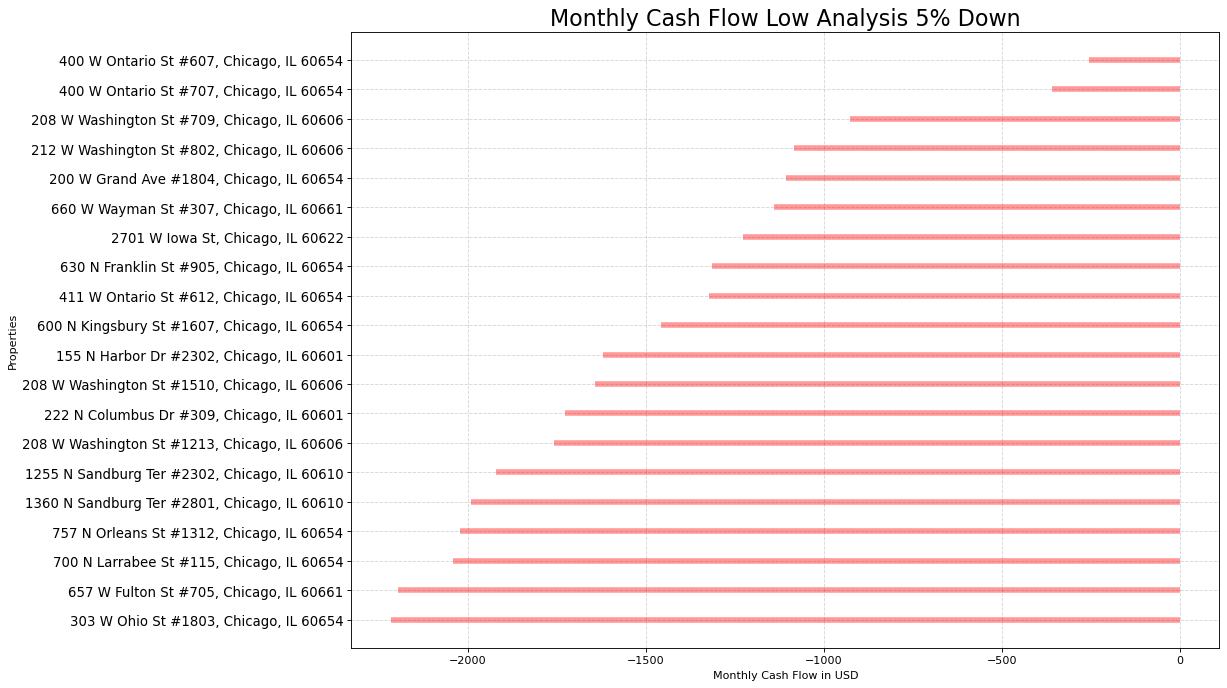

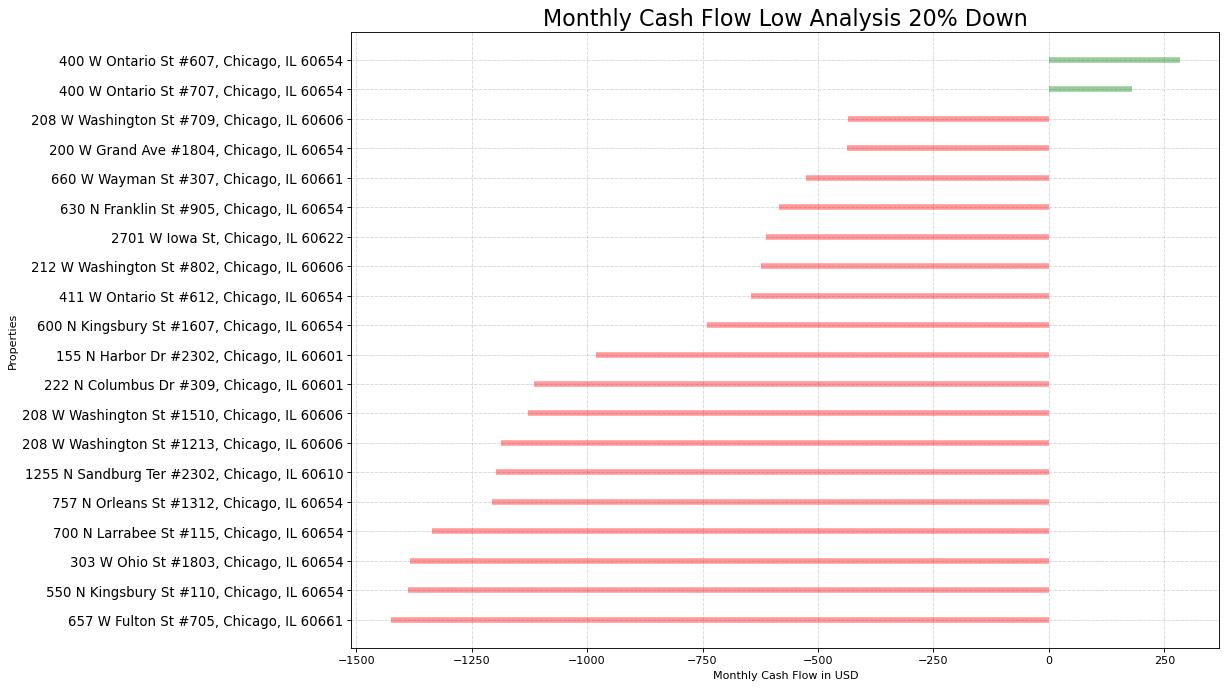

In [43]:
#Collects user input to decide if comp cordinates are aquired through redfin or zillow
comp_choice = str (input("Do you wish your comps to be found through Zillow or Redfin cordinates? (Type  Zillow or Redfin)  "))
if comp_choice.lower() == 'zillow':
    Final = Merged
elif comp_choice.lower() == 'redfin':
    Final = RedfinBuyScrape
else:
    Final = RedfinBuyScrape
    
#percent_down = str (input("What percent down? (5% or 20%)"))
#if percent_down == '20' or percent_down == '20%':
#    adjustment = 1.0
#elif percent_down == '5' or percent_down == '5%':
#    adjustment = 0.0
#else:
#    adjustment = 0.0
graph_amount = int (input("How many properties do you wish to graph? (1-20)"))
    
comp_amount = int (input("How many comp properties do you wish to consider in cash flow calculations?   "))


Final['Rent est Low'] =Final.apply(lambda row: float (MinCompPrice(row['latitude'], row['longitude'], row['bedrooms'], comp_amount)), axis =1)
Final['Rent est Avg'] =Final.apply(lambda row: float (AvgCompPrice(row['latitude'], row['longitude'], row['bedrooms'], comp_amount)), axis =1)

#Calls min or avg comp price funtion and subtracts estimate mortgage for cash flow gauge
Final['Cash Flow Low 5%'] = Final.apply(lambda row: float (MinCompPrice(row['latitude'], row['longitude'], row['bedrooms'], comp_amount))- row['estimate_mortgage'], axis=1)
Final['Cash Flow Avg 5%'] = Final.apply(lambda row: float (AvgCompPrice(row['latitude'], row['longitude'], row['bedrooms'], comp_amount))- row['estimate_mortgage'], axis=1)
Final['Cash Flow Low 20%'] = Final.apply(lambda row: float (MinCompPrice(row['latitude'], row['longitude'], row['bedrooms'], comp_amount))- (row['estimate_mortgage']-(row['price'] * 0.0015388)), axis=1)
Final['Cash Flow Avg 20%'] = Final.apply(lambda row: float (AvgCompPrice(row['latitude'], row['longitude'], row['bedrooms'], comp_amount))- (row['estimate_mortgage']-(row['price'] * 0.0015388)), axis=1)

#Final.rename(columns={'estimate_mortgage': 'estimate mortgage @5%'}, inplace=True)
Final['estimate mortgage @20%'] = Final['estimate_mortgage'] - (Final['price'] * 0.0015388)

#sorts by highest cash flowing properties
Final = Final.sort_values(by=['Cash Flow Low 5%'], ascending=False)




#Graphing highest cash flow propeties
#Just view plot for explanation
visual1 = Final
visual1 = visual1.set_index('address')
visual1.sort_values('Cash Flow Low 5%', ascending=True, inplace=True)
visual1['colors'] = ['red' if x < 0 else 'green' for x in visual1['Cash Flow Low 5%']]
visual1 = visual1.iloc[-graph_amount:]



plt.figure(figsize=(14,10), dpi= 80)
plt.hlines(y=visual1.index, xmin=0, xmax = visual1['Cash Flow Low 5%'], color=visual1.colors, alpha=0.4, linewidth=5)
plt.title('Monthly Cash Flow Low Analysis 5% Down', fontdict={'size':20})
plt.yticks(visual1.index, fontsize=12)
plt.grid(linestyle='--', alpha=0.5)
plt.gca().set(ylabel='Properties', xlabel= 'Monthly Cash Flow in USD')

plt.show

visual2 = Final
visual2 = visual2.set_index('address')
visual2.sort_values('Cash Flow Low 20%', ascending=True, inplace=True)
visual2['colors'] = ['red' if x < 0 else 'green' for x in visual2['Cash Flow Low 20%']]
visual2 = visual2.iloc[-graph_amount:]



plt.figure(figsize=(14,10), dpi= 80)
plt.hlines(y=visual2.index, xmin=0, xmax = visual2['Cash Flow Low 20%'], color=visual2.colors, alpha=0.4, linewidth=5)
plt.title('Monthly Cash Flow Low Analysis 20% Down', fontdict={'size':20})
plt.yticks(visual2.index, fontsize=12)
plt.grid(linestyle='--', alpha=0.5)
plt.gca().set(ylabel='Properties', xlabel= 'Monthly Cash Flow in USD')

plt.show



# Geopandas Support Functions

The following functions are designed to support the Geopandas section of the code. The first function takes a string of X,Y coordinates and transforms them into points that can be easily interpreted by Geopandas. This conversion is crucial for geospatial data analysis.

The second function, akin to the rental minimum and average functions mentioned earlier, serves a different purpose by providing longitude and latitude coordinates of the closest properties. This function enables users to identify and work with geospatial data related to nearby properties, which is valuable for various geographical analyses.

In [44]:
#breaks strings to be read by geo pandas
def string_to_point(string):
    x, y = map(float, string.split())
    return Point(x, y)

In [45]:
def CompLocater(latitude, longitude, bedrooms, comp_amount):
        df = ZillowRentScrape
        #deletes all non matching beds with only props that have equal beds
        df = df.loc[df["bedrooms"] == bedrooms ]
        #assigns column that messures difference between lat & long and adds them
        df['DistanceMessure'] = np.sqrt((df['latitude'] - latitude)**2 + (df['longitude'] - longitude)**2)
        #sorts values by Distance messures
        df = df.sort_values(by=['DistanceMessure'], ascending=True)
        #grabs top 20 values
        df = df.head(20)
        #sets dataframe equal to lat long cordinates of the index value passed by loop
        df = df[['latitude']].iloc[comp_amount],df[['longitude']].iloc[comp_amount]
        
        
 
        
        
        #print(df) 
        #print (Cord1)
        #print(Comps)
        #print(CompLow)
        return (df)

# Comparative Rental Location Visualization

The code block below introduces a feature that empowers users to visualize the geographical locations of comparable rental listings in relation to the highest-earning properties they've selected. This visualization offers valuable insights into the distribution of rental properties, enabling users to identify potential outliers. In these graphical representations, the property for sale is distinctly marked with a red star, while the rental properties are represented as blue dots. This visualization aids in better understanding the spatial relationship between rental listings and the potential properties.


Of the highest cash flowing properties, how many do you wish to have mapped with comp locations?   8


C:\Users\Administrator\AppData\Local\Temp\ipykernel_15384\2940697431.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best[i] = best.apply(lambda row: CompLocater(row['latitude'], row['longitude'], row['bedrooms'], i), axis=1)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_15384\2940697431.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best[i] = best.apply(lambda row: CompLocater(row['latitude'], row['longitude'], row['bedrooms'], i), axis=1)
C:\Users\Administrator\AppData\Local\Temp\ipykerne

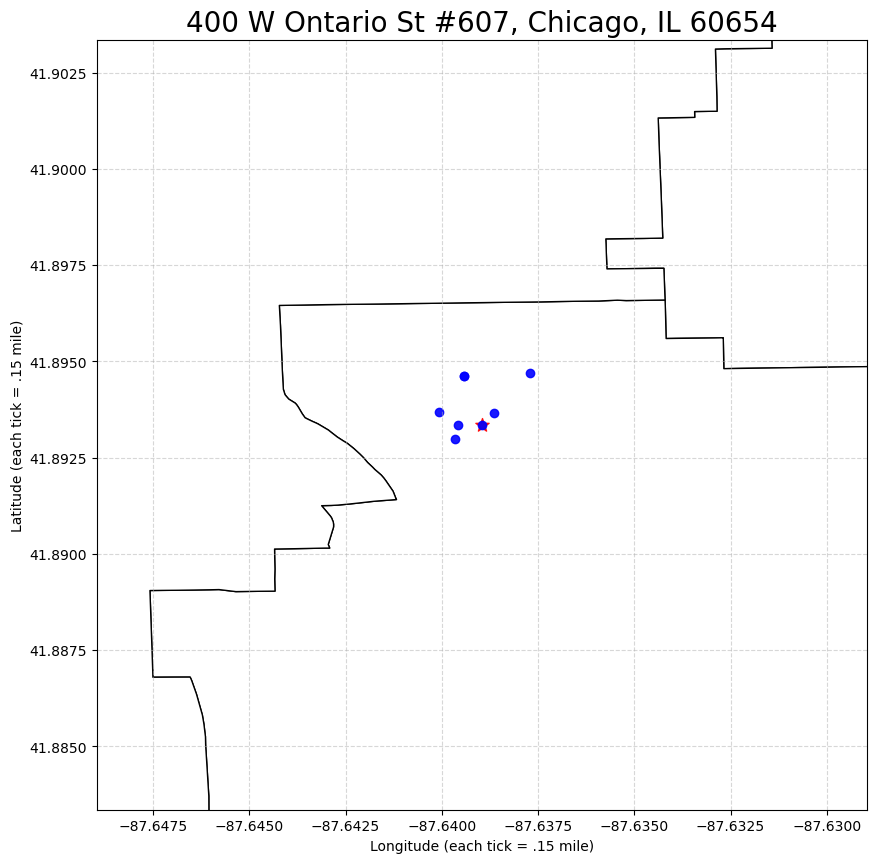

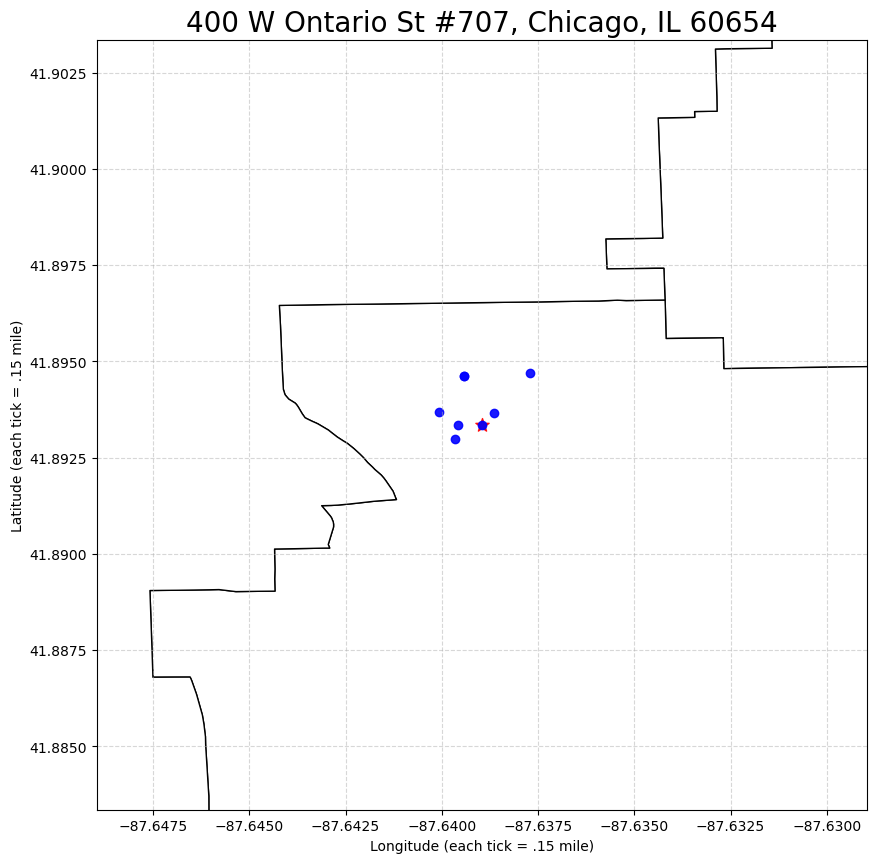

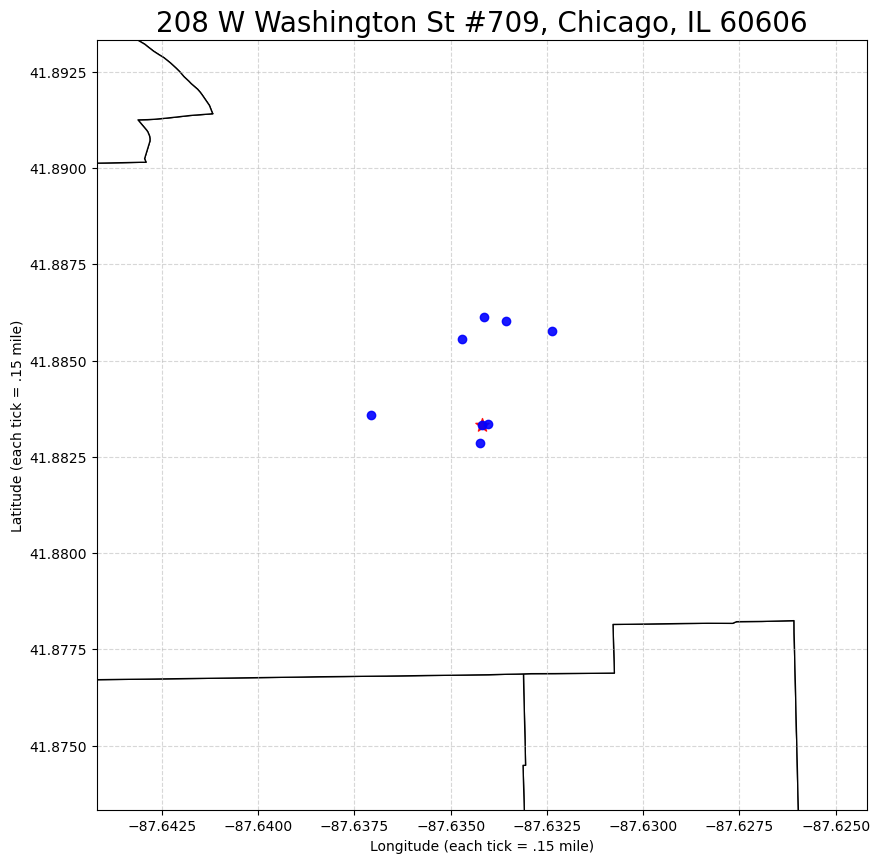

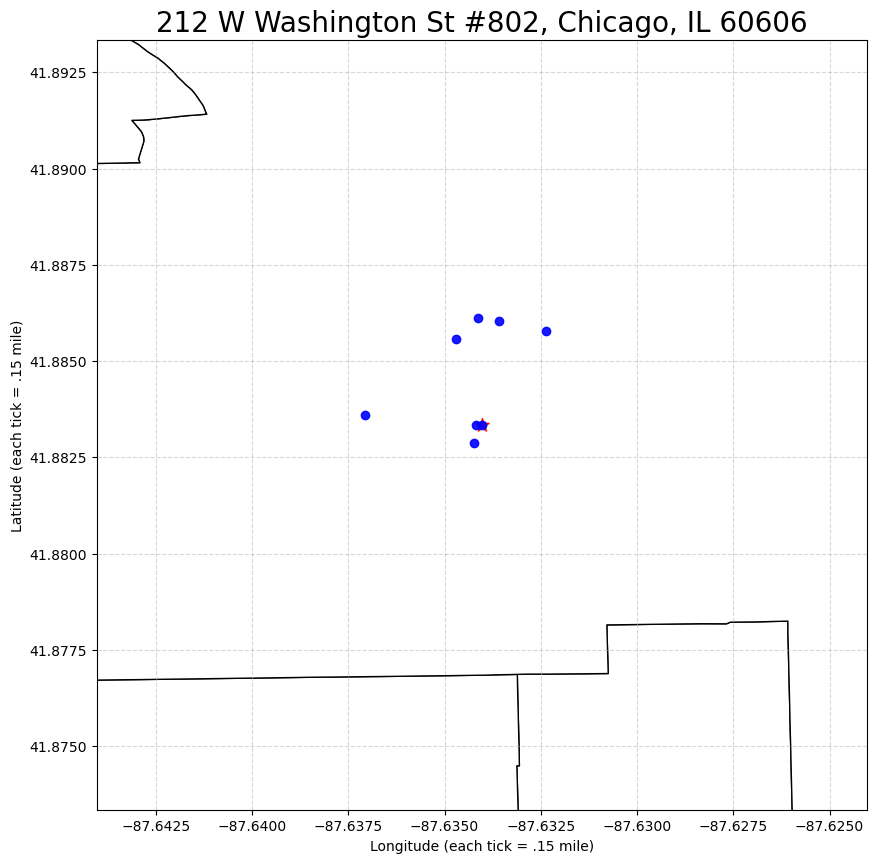

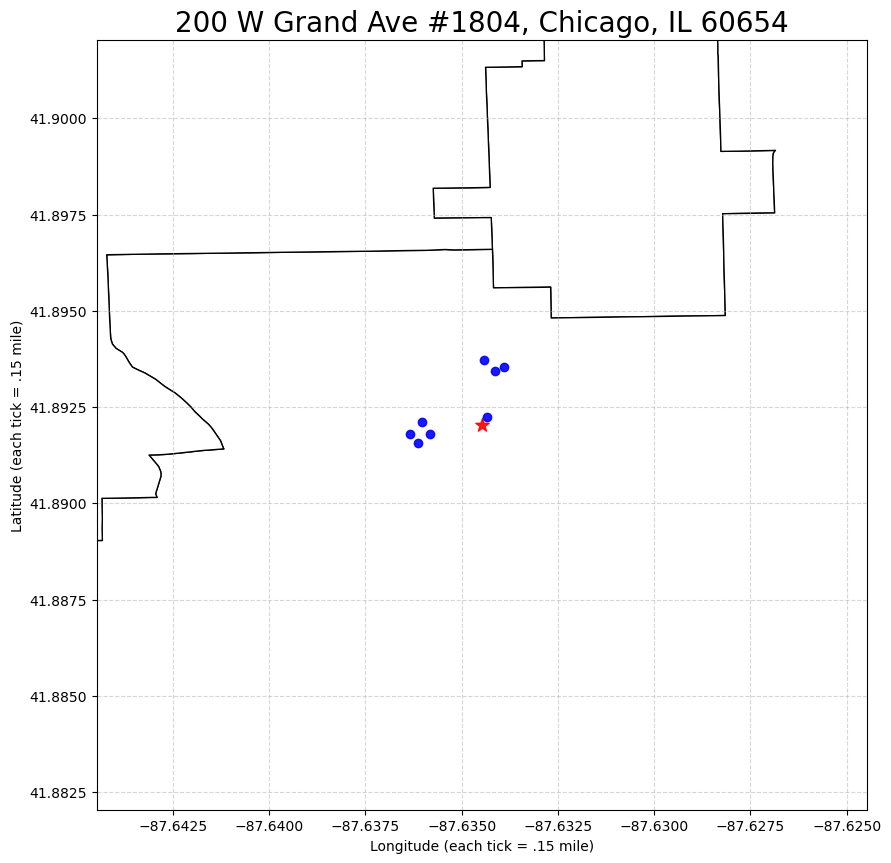

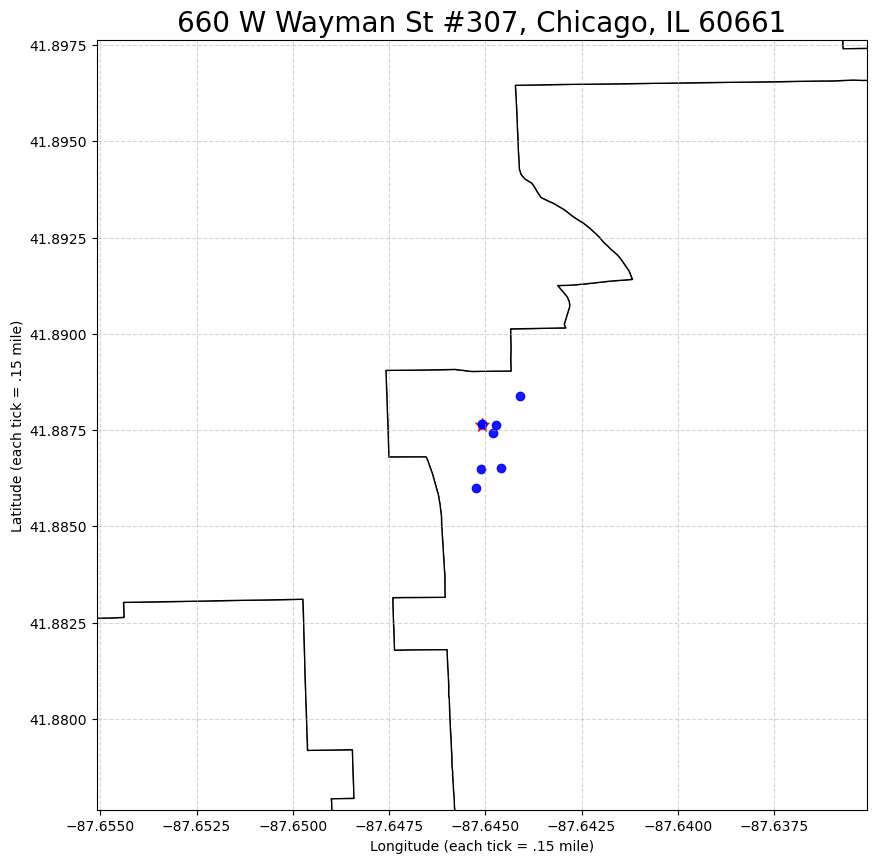

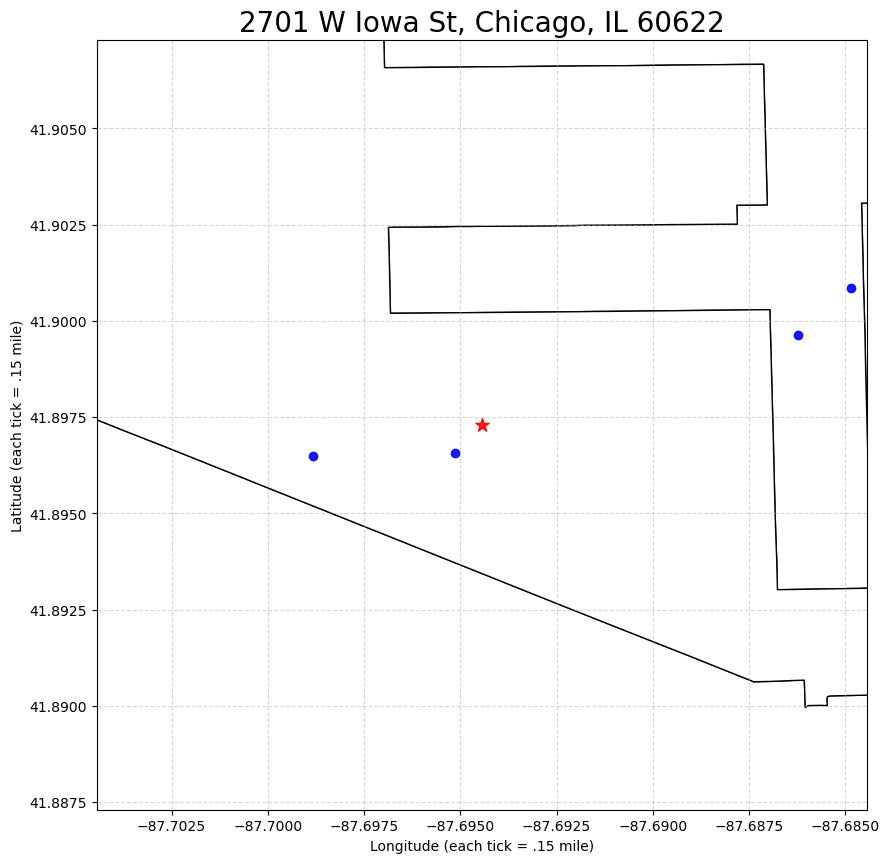

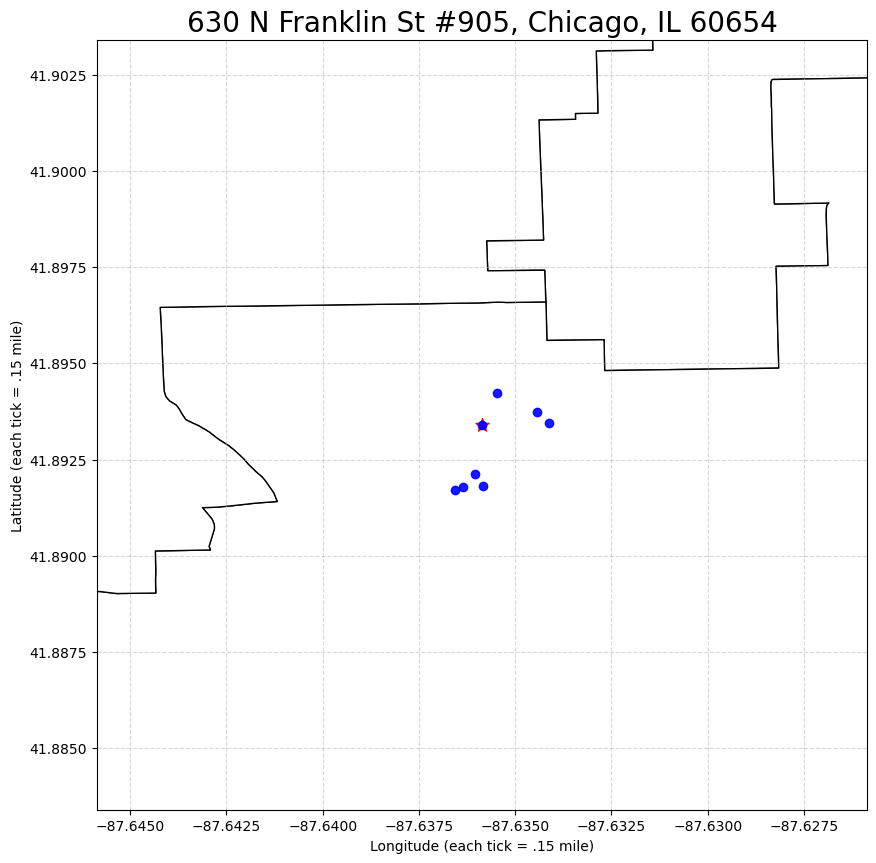

In [46]:
#Maps the highest cash flowing properties and maps the comps
    #this gives a idea of comp concentration
plot_amount = int (input("Of the highest cash flowing properties, how many do you wish to have mapped with comp locations?   "))

#Dataframe for possible propeties to buy
Mapping2 = Final.copy()
Mapping2['Coordinates'] = list(zip(Mapping2.longitude, Mapping2.latitude))
Mapping2['Coordinates'] = Mapping2['Coordinates'].apply(Point)



#Dataframe for comp properties, calls CompLocater to get latlong
comp_amount_input = comp_amount
best = Mapping2.head(plot_amount)
for i in range(comp_amount_input):
    best[i] = best.apply(lambda row: CompLocater(row['latitude'], row['longitude'], row['bedrooms'], i), axis=1)
    {i+1}

        

#extracts long/lat from dataframe above
for i in range(comp_amount_input):
    best[i] = best[i].astype(str)
    best[i] = (best[i].str.extract(r'longitude\s+([\d.-]+)')) + '  ' + (best[i].str.extract(r'latitude\s+([\d.-]+)'))
    {i+1}

for i in range(plot_amount):
    CompMapping = geopandas.read_file('geo_export_d916f11b-fbee-4e54-94ee-60bf7ad450ef.shp')
    CompMapping2 = best
    CompMapping2 = CompMapping2.reset_index(drop=True)
    CompMapping2 = CompMapping2.drop(CompMapping2.index.difference([i]))
    graph_scale_1 = CompMapping2['latitude'].iloc[0]
    graph_scale_2 = CompMapping2['longitude'].iloc[0]



    fig, gax = plt.subplots(figsize=(10,10))

    CompMapping['geometry'].plot(ax = gax, edgecolor='black',color='white')
  

    gdf = geopandas.GeoDataFrame(CompMapping2, geometry='Coordinates')
    gax.set_ylim([(graph_scale_1 - 0.01), (graph_scale_1 + 0.01)])
    gax.set_xlim([(graph_scale_2 - 0.01), (graph_scale_2 + 0.01)])
    gdf.plot(ax=gax, color='red', alpha = 0.9,  marker='*', markersize=100)
# i
        
    new_df = CompMapping2.loc[: ,'Coordinates':].copy()
    new_df = new_df.drop('Coordinates', axis=1)
    new_df = new_df.transpose()
    new_df[i] = new_df[i].apply(string_to_point)
    new_df = geopandas.GeoDataFrame(new_df, geometry=i)
    new_df.plot(ax=gax, color='blue', alpha = 0.9)
    plt.title((CompMapping2['address'].iloc[0]), fontdict={'size':20})
    plt.gca().set(ylabel='Latitude (each tick = .15 mile)', xlabel= 'Longitude (each tick = .15 mile)')
    plt.grid(linestyle='--', alpha=0.5) 

    


#
    

    plt.show()
    




    {i+1}
    

    
  











# Machine Learning Rent Prediction Models

In this section is a machine learning framework that empowers users to select a specific property and employ diverse learning models to predict its rent. The primary advantage of these machine learning models lies in their ability to incorporate property square footages, a factor not accounted for in previous rent projections. This original omission stems from the nuanced relationship between rent and square footage, where a fixed multiplier could introduce inaccuracies due to varying correlation strengths.

It is important to note that these implementations have room for significant improvement through correct scaling and the potential narrowing down to one or two optimal models. The option to choose from various learning models and access Mean Squared Error (MSE) and R^2 metrics is intended for users who possess an understanding of the advantages and limitations of each model, enabling them to make informed decisions based on their specific needs.

In [49]:


#Further investment analysis
Further_Analysis = Final.copy()
Further_Analysis = Further_Analysis.reset_index(drop=True)
print(Further_Analysis)
User_Choice = int (input("Which Property do you wish to futher analyze? Type the property identifier found to the left of the address.\nFor model to properly work, choose only properties with a value in area_sqft\n"))
User_Choice2 = int (input("For rent prediction,\n Type 1 for Random Forest Regressor\n Type 2 for Support Vector Regression\n Type 3 for Gradient Boosting Regressor\n Type 4 for Bayesian Ridge\n"))

#User_Choice_Df = Further_Analysis.iloc[User_Choice].copy()
User_Choice_Df = Further_Analysis.copy()
User_Choice_Df = User_Choice_Df.iloc[[User_Choice]]

#RandomForestRegressorModel
#New DF for userchoice tailored to model input
User_Choice_RF = User_Choice_Df[['longitude', 'latitude', 'bedrooms', 'bathrooms', 'area_sqft']].copy()
User_Choice_RF.rename(columns={'area_sqft': 'area'}, inplace=True)

#New DF for train/test data
Predict1 = ZillowRentScrape[['longitude','latitude','price','area','bedrooms','bathrooms']].copy()

#Drops na for no model errors
Predict1.dropna(inplace=True)

Predict1['area'] = Predict1['area'].str.replace(' sqft', '').astype(float)

#important features
features = ['latitude', 'longitude', 'bathrooms', 'bedrooms', 'area']
target = 'price'

#setting train/test data
X_train, X_test, y_train, y_test = train_test_split(Predict1[features], Predict1[target], test_size=0.16, random_state=42)



# Create and train the Random Forest Regression model
### n_estimators amount of probability trees
if User_Choice2 == 1 :
    model = RandomForestRegressor(n_estimators=100, random_state=42)
if User_Choice2 == 2 :
    model = SVR()
if User_Choice2 == 3 :
    model =  GradientBoostingRegressor(random_state=42)
if User_Choice2 == 4 :
    model =  BayesianRidge()
    
model.fit(X_train, y_train)


# Make predictions on the test set
y_pred = model.predict(X_test)



# Calculate mean squared error as a performance metric
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared:', r2)


input_df = pd.DataFrame(User_Choice_RF, columns=['latitude', 'longitude', 'bathrooms', 'bedrooms', 'area'])




predicted_price = model.predict(input_df)



if User_Choice2 == 1 :
    print('Random Forest Regressor Predicted Rent:', predicted_price)
if User_Choice2 == 2 :
    print('Support Vector Regression Predicted Rent:', predicted_price)
if User_Choice2 == 3 :
    print('Gradient Boosting Regressor Predicted Rent:', predicted_price)
if User_Choice2 == 4 :
    print('Bayesian Ridge Predicted Rent:', predicted_price)




At5 = predicted_price - User_Choice_Df['estimate_mortgage'].iloc[0]
At20 =  predicted_price - ((User_Choice_Df['estimate_mortgage'].iloc[0]) - (User_Choice_Df['price'].iloc[0] * 0.0015388))

print('Selected ML model predicted cash flow at 5% down:', At5)
print('Selected ML model cash flow at 20% down:', At20)


print("-------------------------------------------------------------------------------------------")







                                           address   latitude  longitude  \
0         400 W Ontario St #607, Chicago, IL 60654  41.893356 -87.638960   
1         400 W Ontario St #707, Chicago, IL 60654  41.893356 -87.638960   
2      208 W Washington St #709, Chicago, IL 60606  41.883335 -87.634190   
3      212 W Washington St #802, Chicago, IL 60606  41.883347 -87.634030   
4         200 W Grand Ave #1804, Chicago, IL 60654  41.892040 -87.634476   
5          660 W Wayman St #307, Chicago, IL 60661  41.887638 -87.645090   
6                2701 W Iowa St, Chicago, IL 60622  41.897305 -87.694440   
7        630 N Franklin St #905, Chicago, IL 60654  41.893406 -87.635864   
8         411 W Ontario St #612, Chicago, IL 60654  41.892975 -87.639660   
9      600 N Kingsbury St #1607, Chicago, IL 60654  41.892920 -87.641594   
10        155 N Harbor Dr #2302, Chicago, IL 60601  41.884920 -87.614790   
11    208 W Washington St #1510, Chicago, IL 60606  41.883335 -87.634190   
12       222

# Focused Machine Learning on Comparable Properties


In this unfinished section, the possibility is explored of refining the machine learning model to concentrate solely on learning from the found comparable properties rather than using all the rental properties obtained through scraping. This approach allows for a more targeted and specialized model training process. By narrowing the model's focus to the most relevant and similar properties, it aims to enhance its predictive accuracy, particularly when it comes to predicting rents for specific properties of interest. This potential integration aligns with the idea of tailoring machine learning models for more precise and context-specific predictions

In [50]:
def MLCompDf( latitude, longitude, bedrooms, comp_amount): 
        df = ZillowRentScrape
        #deletes all non matching beds with only props that have equal beds
        df = df.loc[df["bedrooms"] == bedrooms ]
        #assigns column that messures difference between lat & long and adds them
        df['DistanceMessure'] = np.sqrt((df['latitude'] - latitude)**2 + (df['longitude'] - longitude)**2)
        #sorts values by Distance messures
        df = df.sort_values(by=['DistanceMessure'], ascending=True)
        #grabs given amount of values which are closest comps
        Comps = df.head(comp_amount)
        #Comps = df['price'].head(comp_amount)
        #averages price of comps
        #CompAvg = Comps.mean()
     
        #print (df)
        #print(Comps)
        #print(CompAvg)
        return (Comps)

# Further Investment Insights and Analytics

This section extends the logic from Real Estate Acquisition Advisor Version 1, offering an in-depth analysis of the selected property within the machine learning models. Users are prompted to provide various inputs, including mortgage duration, holding periods, current interest rates, expenses, rent adjustments, and vacancy rates. Using these user-defined values, the system generates valuable insights into investment scenarios, such as property value projections, Multiple on Invested Capital (MOIC) over time, and neighborhood analytics sourced from Niche. Additionally, it provides trends in property values by zip code through Zillow property data. This comprehensive analysis empowers users with a thorough understanding of their investment's potential and associated financial outcomes.

What is the current interest rate?
6.5
What percent do you intend to put down? (5 or 20)
20
What term length? (15 or 30 years)
30
What is the Annual Expense Increase Rate?
6
What is the Annual Rent Increase Rate?
7
What is the predicted vacancy?
5
What is the predicted Annual HPI?
7.5
After how many months do you intend to sell?
If you don't, enter 0 
240
                                    address   latitude  longitude     price  \
0  400 W Ontario St #607, Chicago, IL 60654  41.893356  -87.63896  350000.0   

   bathrooms  bedrooms  area_sqft  \
0        2.0       2.0     1100.0   

                                        property_url  estimate_mortgage  \
0  https://www.zillow.com/homedetails/400-W-Ontar...            3554.58   

   Rent est Low  Rent est Avg  Cash Flow Low 5%  Cash Flow Avg 5%  \
0        3300.0      3574.875           -254.58            20.295   

   Cash Flow Low 20%  Cash Flow Avg 20%  estimate mortgage @20%  
0              284.0            558.875             

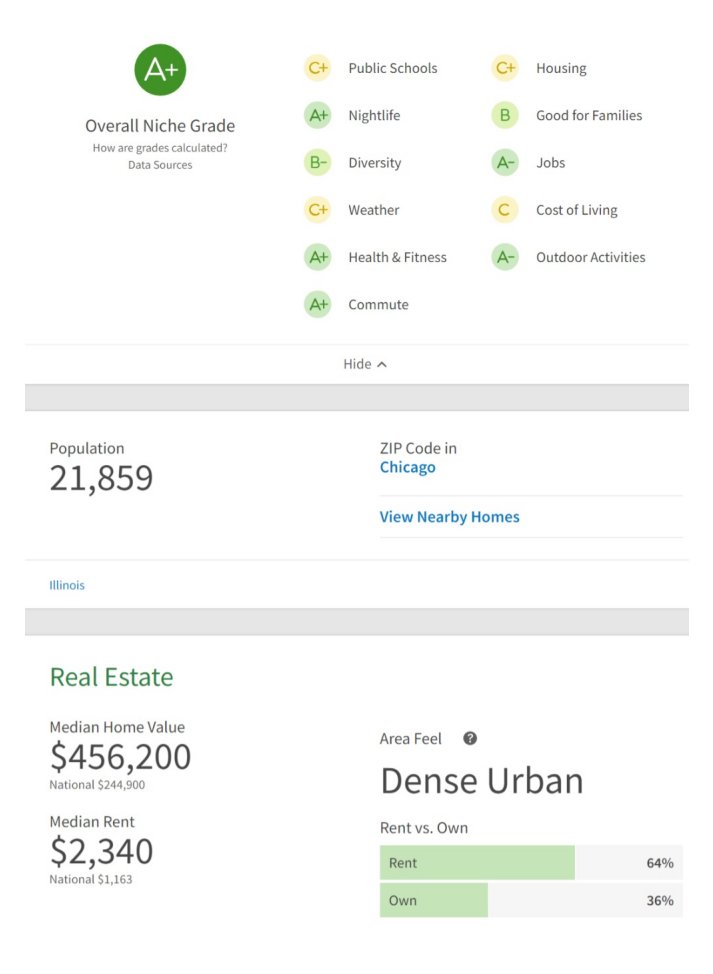

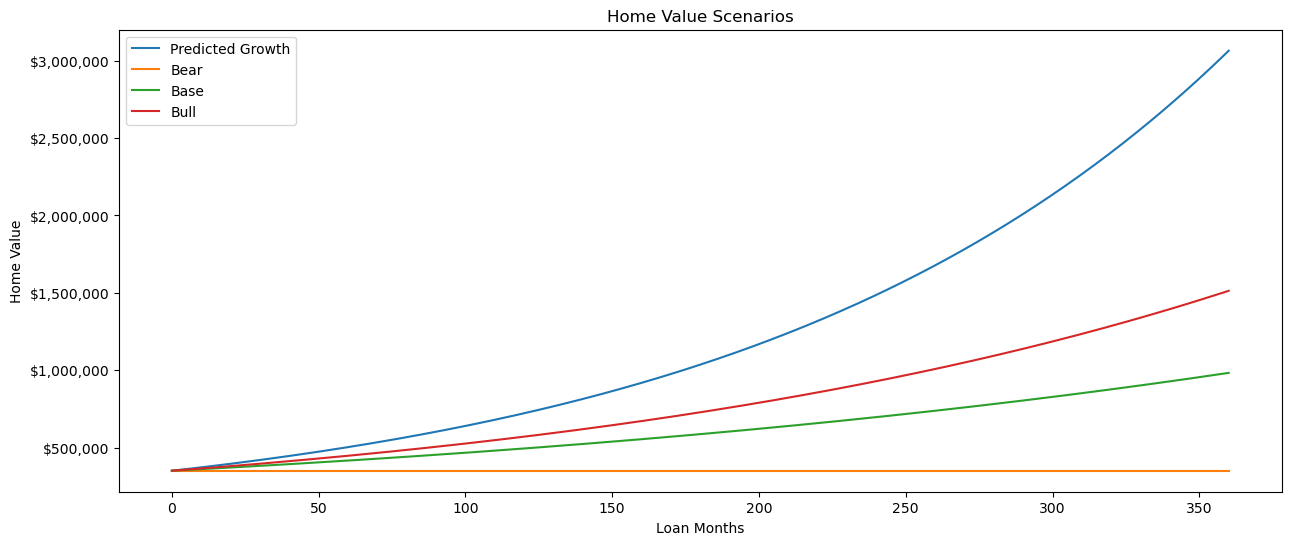

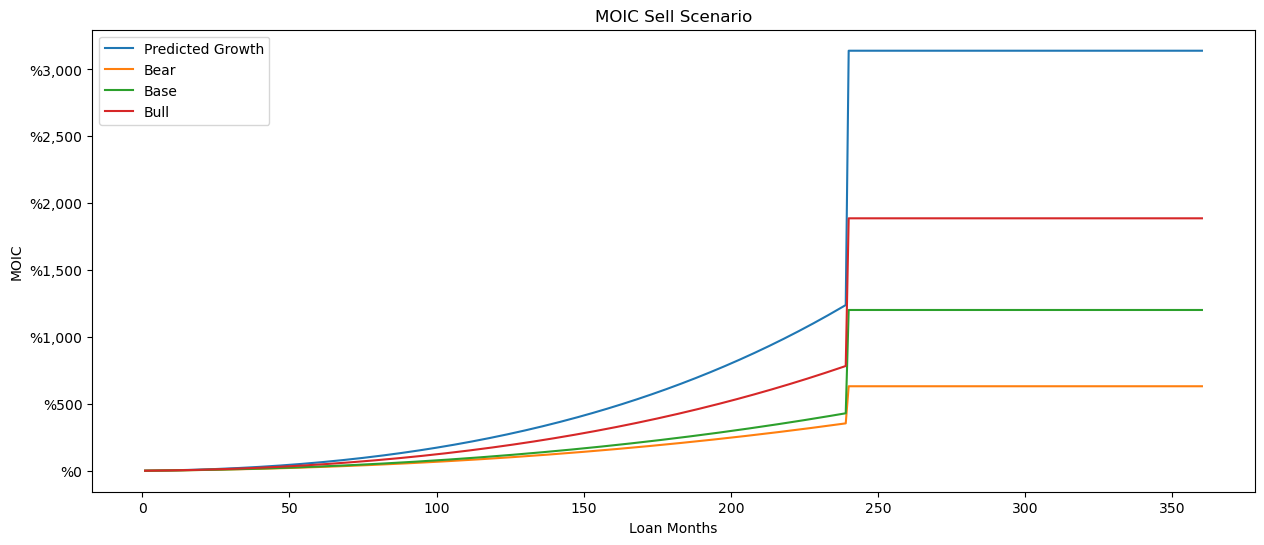

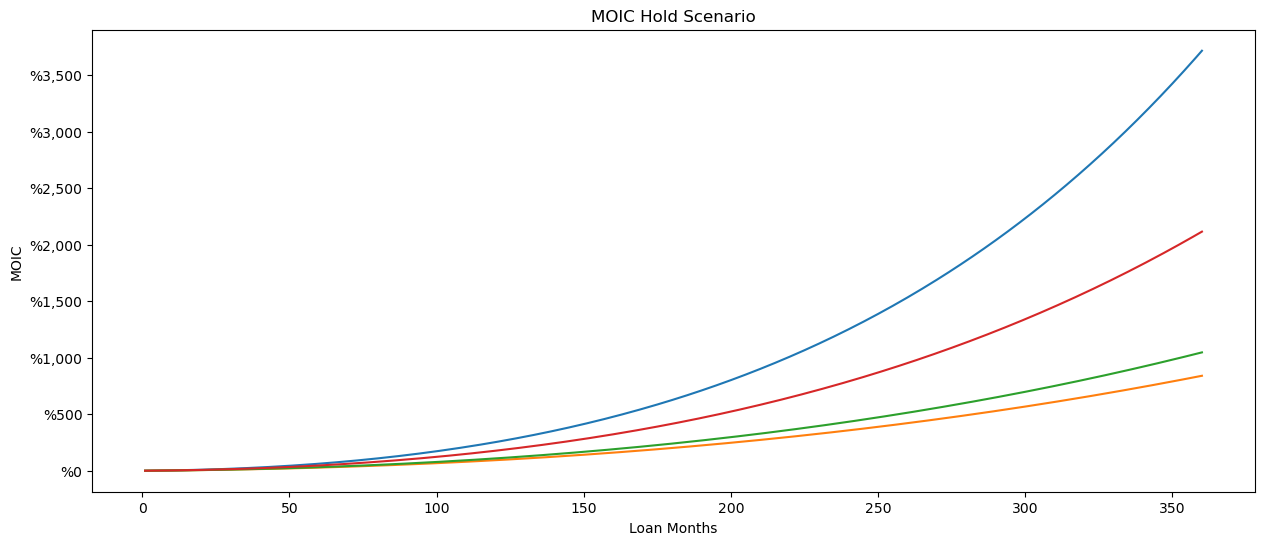

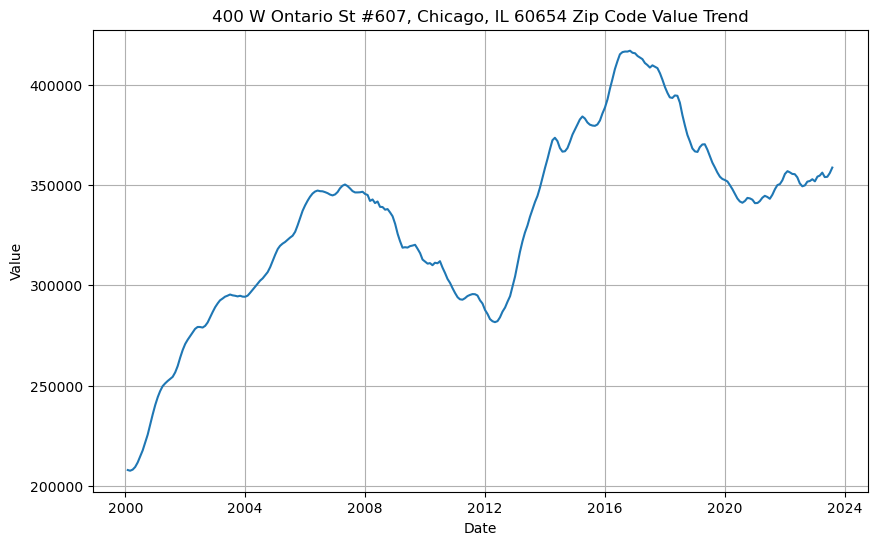

In [61]:
Int_Rate = float (input("What is the current interest rate?\n"))
D_Payment = float (input ("What percent do you intend to put down? (5 or 20)\n"))
Term = float (input ("What term length? (15 or 30 years)\n"))
ExpenseInc = float (input ("What is the Annual Expense Increase Rate?\n"))
ExpenseInc = ExpenseInc/100.0
RentInc = float (input ("What is the Annual Rent Increase Rate?\n"))
RentInc = RentInc/100.0
Vacancy = float (input ("What is the predicted vacancy?\n"))
Vacancy = Vacancy/100.0
HPI = float (input ("What is the predicted Annual HPI?\n"))
CashOut = int (input ("After how many months do you intend to sell?\nIf you don't, enter 0 \n"))

Term_Months = 0
if Term == 15:
    Term_Months = 181
if Term == 30:
    Term_Months = 361
if CashOut == 0:
    Cashout = Term_Months

    
    

Deep_Analysis = User_Choice_Df.copy()
Deep_Analysis = Deep_Analysis.reset_index(drop=True)
#Deep_Analysis.reset_index(drop=True)
#Deep_Analysis = Deep_Analysis.transpose()
print(Deep_Analysis)


##############################################################################################################
#Niche Rating
AddressWCode = Deep_Analysis.iloc[0, 0]
ZipCode = int(AddressWCode[-5:])
image_path = r'C:\Users\Administrator\Dropbox\Apps\ScrapeHero-Cloud\{}.jpeg'.format(ZipCode)
image = mpimg.imread(image_path)
plt.figure(dpi=250)
plt.imshow(image)
plt.axis('off')
plt.show()

##############################################################################################################
loan_months = list(range(0, Term_Months))


##############################################################################################################
df = pd.DataFrame(index=loan_months)
df['Loan Months'] = loan_months
df['Loan Payment'] = 0.0
df['Loan Interest'] = 0.0
df['Loan Principal'] = 0.0
df['Loan Balance'] = 0.0
df['Cumulative Principal (No Appreciation)'] = 0.0
df['Cumulative Principal (Appreciation)'] = 0.0
df['Expense Index'] = 0.0
df['Rental Index'] = 0.0
df['Rent Value'] = 0.0
df['Net Rent Approximation'] = 0.0
df['Property Level HPI'] = 0.0
df['Home Value'] = 0.0
df['Cash Flow Approximation (Hold)'] = 0.0
df['Cumulative Net Income (Hold)'] = 0.0
df['MOIC (Hold)'] =0.0
df['Cash Flow Approximation (Sell)'] =0.0
df['Cumulative Net Income (Sell)'] =0.0
df['MOIC (Sell)'] =0.0

df.loc[0, 'Loan Balance'] = (1-(D_Payment/100)) * Deep_Analysis['price'].iloc[0]
df.loc[0, 'Loan Payment'] = Deep_Analysis['price'].iloc[0]*(D_Payment/100)
df.loc[0, 'Loan Principal'] = df.loc[0, 'Loan Payment']
df.loc[1:, 'Loan Payment'] =  (npf.pmt((Int_Rate/100)/12, Term_Months-1, -(df.loc[0, 'Loan Balance'])))
df.loc[1:,'Loan Interest'] = npf.ipmt((Int_Rate/100)/12, df['Loan Months'].iloc[1:], Term_Months-1, -(df.loc[0, 'Loan Balance']))
df.loc[1:,'Loan Principal'] = npf.ppmt((Int_Rate/100)/12, df['Loan Months'].iloc[1:], Term_Months-1, -(df.loc[0, 'Loan Balance']))


for i in range(1, len(df)-1):
    df.at[i, 'Loan Balance'] = df.at[i-1, 'Loan Balance'] - (df.at[i, 'Loan Principal'])
    
    
df.loc[0, 'Cumulative Principal (No Appreciation)'] = df.loc[0, 'Loan Principal']

for i in range(1, len(df)):
    df.at[i, 'Cumulative Principal (No Appreciation)'] = df.at[i-1, 'Cumulative Principal (No Appreciation)'] + (df.at[i, 'Loan Principal'])
    
df.loc[0, 'Expense Index'] = 100
for i in range(1, len(df)):
    df.at[i, 'Expense Index'] = df.at[i-1, 'Expense Index'] * (ExpenseInc + 1) ** (1/12)
    
    
df.loc[0, 'Rental Index'] = 100
for i in range(1, len(df)):
    df.at[i, 'Rental Index'] = df.at[i-1, 'Rental Index'] * (RentInc + 1) ** (1/12)

#df.loc[1, 'Rent Value'] = Deep_Analysis.loc[0, 'Rent est Low'] * df.loc[1, 'Rental Index']
for i in range(1, len(df)):
    df.at[i, 'Rent Value'] = Deep_Analysis.loc[0, 'Rent est Low'] * (df.loc[i, 'Rental Index']/100)

df['Net Rent Approximation'] = df['Rent Value'] * (1-Vacancy)

df.loc[0, 'Property Level HPI'] = 1
for i in range(1, len(df)):
    df.at[i, 'Property Level HPI'] = df.at[i-1, 'Property Level HPI'] * ((HPI/100) + 1) ** (1/12)
    
df['Home Value'] =  Deep_Analysis.loc[0, 'price'] * df['Property Level HPI']

df['Cumulative Principal (Appreciation)'] = df['Cumulative Principal (No Appreciation)'] + df['Home Value'] - Deep_Analysis.loc[0, 'price']

df.loc[0:,'Cash Flow Approximation (Hold)'] =df.loc[0,'Net Rent Approximation'] - df.loc[0,'Loan Payment'] 

if D_Payment == 5:
    df.loc[1:,'Cash Flow Approximation (Hold)'] = df['Net Rent Approximation'] - Deep_Analysis.loc[0,'estimate_mortgage']
    
if D_Payment == 20:
    df.loc[1:,'Cash Flow Approximation (Hold)'] = df['Net Rent Approximation'] - Deep_Analysis.loc[0,'estimate mortgage @20%']

df.loc[0,'Cumulative Net Income (Hold)'] = df.loc[0,'Cash Flow Approximation (Hold)']

for i in range(1, len(df)):
    df.at[i, 'Cumulative Net Income (Hold)'] = df.at[i-1, 'Cumulative Net Income (Hold)'] + df.at[i,'Cash Flow Approximation (Hold)']
    

df['MOIC (Hold)'] = -(df.loc[1:, 'Cash Flow Approximation (Hold)'].cumsum() / df.loc[0, 'Cash Flow Approximation (Hold)'])
#df['MOIC (Hold)'] = df['MOIC (Hold)'] * 100

for i in range(0, CashOut) :
    df.at[i, 'Cash Flow Approximation (Sell)'] = df.at[i, 'Cash Flow Approximation (Hold)'] 
    
df.loc[CashOut,'Cash Flow Approximation (Sell)']  = df.loc[CashOut,'Cumulative Principal (Appreciation)']

df.loc[0,'Cumulative Net Income (Sell)'] = df.loc[0,'Cash Flow Approximation (Sell)'] 

for i in range(1, len(df)):
    df.at[i, 'Cumulative Net Income (Sell)'] = df.at[i-1, 'Cumulative Net Income (Sell)'] + df.at[i,'Cash Flow Approximation (Sell)']
    
df['MOIC (Sell)'] = -(df.loc[1:, 'Cash Flow Approximation (Sell)'].cumsum() / df.loc[0, 'Cash Flow Approximation (Sell)'])
#df['MOIC (Sell)'] = df['MOIC (Sell)'] * 100

dfPred = df

#########################################################################################################################
RentInc = 2.5
RentInc = RentInc/100.0
HPI = 0

df = pd.DataFrame(index=loan_months)
df['Loan Months'] = loan_months
df['Loan Payment'] = 0.0
df['Loan Interest'] = 0.0
df['Loan Principal'] = 0.0
df['Loan Balance'] = 0.0
df['Cumulative Principal (No Appreciation)'] = 0.0
df['Cumulative Principal (Appreciation)'] = 0.0
df['Expense Index'] = 0.0
df['Rental Index'] = 0.0
df['Rent Value'] = 0.0
df['Net Rent Approximation'] = 0.0
df['Property Level HPI'] = 0.0
df['Home Value'] = 0.0
df['Cash Flow Approximation (Hold)'] = 0.0
df['Cumulative Net Income (Hold)'] = 0.0
df['MOIC (Hold)'] =0.0
df['Cash Flow Approximation (Sell)'] =0.0
df['Cumulative Net Income (Sell)'] =0.0
df['MOIC (Sell)'] =0.0

df.loc[0, 'Loan Balance'] = (1-(D_Payment/100)) * Deep_Analysis['price'].iloc[0]
df.loc[0, 'Loan Payment'] = Deep_Analysis['price'].iloc[0]*(D_Payment/100)
df.loc[0, 'Loan Principal'] = df.loc[0, 'Loan Payment']
df.loc[1:, 'Loan Payment'] =  (npf.pmt((Int_Rate/100)/12, Term_Months-1, -(df.loc[0, 'Loan Balance'])))
df.loc[1:,'Loan Interest'] = npf.ipmt((Int_Rate/100)/12, df['Loan Months'].iloc[1:], Term_Months-1, -(df.loc[0, 'Loan Balance']))
df.loc[1:,'Loan Principal'] = npf.ppmt((Int_Rate/100)/12, df['Loan Months'].iloc[1:], Term_Months-1, -(df.loc[0, 'Loan Balance']))


for i in range(1, len(df)-1):
    df.at[i, 'Loan Balance'] = df.at[i-1, 'Loan Balance'] - (df.at[i, 'Loan Principal'])
    
    
df.loc[0, 'Cumulative Principal (No Appreciation)'] = df.loc[0, 'Loan Principal']

for i in range(1, len(df)):
    df.at[i, 'Cumulative Principal (No Appreciation)'] = df.at[i-1, 'Cumulative Principal (No Appreciation)'] + (df.at[i, 'Loan Principal'])
    
df.loc[0, 'Expense Index'] = 100
for i in range(1, len(df)):
    df.at[i, 'Expense Index'] = df.at[i-1, 'Expense Index'] * (ExpenseInc + 1) ** (1/12)
    
    
df.loc[0, 'Rental Index'] = 100
for i in range(1, len(df)):
    df.at[i, 'Rental Index'] = df.at[i-1, 'Rental Index'] * (RentInc + 1) ** (1/12)

#df.loc[1, 'Rent Value'] = Deep_Analysis.loc[0, 'Rent est Low'] * df.loc[1, 'Rental Index']
for i in range(1, len(df)):
    df.at[i, 'Rent Value'] = Deep_Analysis.loc[0, 'Rent est Low'] * (df.loc[i, 'Rental Index']/100)

df['Net Rent Approximation'] = df['Rent Value'] * (1-Vacancy)

df.loc[0, 'Property Level HPI'] = 1
for i in range(1, len(df)):
    df.at[i, 'Property Level HPI'] = df.at[i-1, 'Property Level HPI'] * ((HPI/100) + 1) ** (1/12)
    
df['Home Value'] =  Deep_Analysis.loc[0, 'price'] * df['Property Level HPI']

df['Cumulative Principal (Appreciation)'] = df['Cumulative Principal (No Appreciation)'] + df['Home Value'] - Deep_Analysis.loc[0, 'price']

df.loc[0:,'Cash Flow Approximation (Hold)'] =df.loc[0,'Net Rent Approximation'] - df.loc[0,'Loan Payment'] 

if D_Payment == 5:
    df.loc[1:,'Cash Flow Approximation (Hold)'] = df['Net Rent Approximation'] - Deep_Analysis.loc[0,'estimate_mortgage']
    
if D_Payment == 20:
    df.loc[1:,'Cash Flow Approximation (Hold)'] = df['Net Rent Approximation'] - Deep_Analysis.loc[0,'estimate mortgage @20%']

df.loc[0,'Cumulative Net Income (Hold)'] = df.loc[0,'Cash Flow Approximation (Hold)']

for i in range(1, len(df)):
    df.at[i, 'Cumulative Net Income (Hold)'] = df.at[i-1, 'Cumulative Net Income (Hold)'] + df.at[i,'Cash Flow Approximation (Hold)']
    

df['MOIC (Hold)'] = -(df.loc[1:, 'Cash Flow Approximation (Hold)'].cumsum() / df.loc[0, 'Cash Flow Approximation (Hold)'])
#df['MOIC (Hold)'] = df['MOIC (Hold)'] * 100

for i in range(0, CashOut) :
    df.at[i, 'Cash Flow Approximation (Sell)'] = df.at[i, 'Cash Flow Approximation (Hold)'] 
    
df.loc[CashOut,'Cash Flow Approximation (Sell)']  = df.loc[CashOut,'Cumulative Principal (Appreciation)']

df.loc[0,'Cumulative Net Income (Sell)'] = df.loc[0,'Cash Flow Approximation (Sell)'] 

for i in range(1, len(df)):
    df.at[i, 'Cumulative Net Income (Sell)'] = df.at[i-1, 'Cumulative Net Income (Sell)'] + df.at[i,'Cash Flow Approximation (Sell)']
    
df['MOIC (Sell)'] = -(df.loc[1:, 'Cash Flow Approximation (Sell)'].cumsum() / df.loc[0, 'Cash Flow Approximation (Sell)'])
#df['MOIC (Sell)'] = df['MOIC (Sell)'] * 100

dfBear = df


##########################################################################################################################

RentInc = 3.0
RentInc = RentInc/100.0
HPI = 3.5

df = pd.DataFrame(index=loan_months)
df['Loan Months'] = loan_months
df['Loan Payment'] = 0.0
df['Loan Interest'] = 0.0
df['Loan Principal'] = 0.0
df['Loan Balance'] = 0.0
df['Cumulative Principal (No Appreciation)'] = 0.0
df['Cumulative Principal (Appreciation)'] = 0.0
df['Expense Index'] = 0.0
df['Rental Index'] = 0.0
df['Rent Value'] = 0.0
df['Net Rent Approximation'] = 0.0
df['Property Level HPI'] = 0.0
df['Home Value'] = 0.0
df['Cash Flow Approximation (Hold)'] = 0.0
df['Cumulative Net Income (Hold)'] = 0.0
df['MOIC (Hold)'] =0.0
df['Cash Flow Approximation (Sell)'] =0.0
df['Cumulative Net Income (Sell)'] =0.0
df['MOIC (Sell)'] =0.0

df.loc[0, 'Loan Balance'] = (1-(D_Payment/100)) * Deep_Analysis['price'].iloc[0]
df.loc[0, 'Loan Payment'] = Deep_Analysis['price'].iloc[0]*(D_Payment/100)
df.loc[0, 'Loan Principal'] = df.loc[0, 'Loan Payment']
df.loc[1:, 'Loan Payment'] =  (npf.pmt((Int_Rate/100)/12, Term_Months-1, -(df.loc[0, 'Loan Balance'])))
df.loc[1:,'Loan Interest'] = npf.ipmt((Int_Rate/100)/12, df['Loan Months'].iloc[1:], Term_Months-1, -(df.loc[0, 'Loan Balance']))
df.loc[1:,'Loan Principal'] = npf.ppmt((Int_Rate/100)/12, df['Loan Months'].iloc[1:], Term_Months-1, -(df.loc[0, 'Loan Balance']))


for i in range(1, len(df)-1):
    df.at[i, 'Loan Balance'] = df.at[i-1, 'Loan Balance'] - (df.at[i, 'Loan Principal'])
    
    
df.loc[0, 'Cumulative Principal (No Appreciation)'] = df.loc[0, 'Loan Principal']

for i in range(1, len(df)):
    df.at[i, 'Cumulative Principal (No Appreciation)'] = df.at[i-1, 'Cumulative Principal (No Appreciation)'] + (df.at[i, 'Loan Principal'])
    
df.loc[0, 'Expense Index'] = 100
for i in range(1, len(df)):
    df.at[i, 'Expense Index'] = df.at[i-1, 'Expense Index'] * (ExpenseInc + 1) ** (1/12)
    
    
df.loc[0, 'Rental Index'] = 100
for i in range(1, len(df)):
    df.at[i, 'Rental Index'] = df.at[i-1, 'Rental Index'] * (RentInc + 1) ** (1/12)

#df.loc[1, 'Rent Value'] = Deep_Analysis.loc[0, 'Rent est Low'] * df.loc[1, 'Rental Index']
for i in range(1, len(df)):
    df.at[i, 'Rent Value'] = Deep_Analysis.loc[0, 'Rent est Low'] * (df.loc[i, 'Rental Index']/100)

df['Net Rent Approximation'] = df['Rent Value'] * (1-Vacancy)

df.loc[0, 'Property Level HPI'] = 1
for i in range(1, len(df)):
    df.at[i, 'Property Level HPI'] = df.at[i-1, 'Property Level HPI'] * ((HPI/100) + 1) ** (1/12)
    
df['Home Value'] =  Deep_Analysis.loc[0, 'price'] * df['Property Level HPI']

df['Cumulative Principal (Appreciation)'] = df['Cumulative Principal (No Appreciation)'] + df['Home Value'] - Deep_Analysis.loc[0, 'price']

df.loc[0:,'Cash Flow Approximation (Hold)'] =df.loc[0,'Net Rent Approximation'] - df.loc[0,'Loan Payment'] 

if D_Payment == 5:
    df.loc[1:,'Cash Flow Approximation (Hold)'] = df['Net Rent Approximation'] - Deep_Analysis.loc[0,'estimate_mortgage']
    
if D_Payment == 20:
    df.loc[1:,'Cash Flow Approximation (Hold)'] = df['Net Rent Approximation'] - Deep_Analysis.loc[0,'estimate mortgage @20%']

df.loc[0,'Cumulative Net Income (Hold)'] = df.loc[0,'Cash Flow Approximation (Hold)']

for i in range(1, len(df)):
    df.at[i, 'Cumulative Net Income (Hold)'] = df.at[i-1, 'Cumulative Net Income (Hold)'] + df.at[i,'Cash Flow Approximation (Hold)']
    

df['MOIC (Hold)'] = -(df.loc[1:, 'Cash Flow Approximation (Hold)'].cumsum() / df.loc[0, 'Cash Flow Approximation (Hold)'])
#df['MOIC (Hold)'] = df['MOIC (Hold)'] * 100

for i in range(0, CashOut) :
    df.at[i, 'Cash Flow Approximation (Sell)'] = df.at[i, 'Cash Flow Approximation (Hold)'] 
    
df.loc[CashOut,'Cash Flow Approximation (Sell)']  = df.loc[CashOut,'Cumulative Principal (Appreciation)']

df.loc[0,'Cumulative Net Income (Sell)'] = df.loc[0,'Cash Flow Approximation (Sell)'] 

for i in range(1, len(df)):
    df.at[i, 'Cumulative Net Income (Sell)'] = df.at[i-1, 'Cumulative Net Income (Sell)'] + df.at[i,'Cash Flow Approximation (Sell)']
    
df['MOIC (Sell)'] = -(df.loc[1:, 'Cash Flow Approximation (Sell)'].cumsum() / df.loc[0, 'Cash Flow Approximation (Sell)'])
#df['MOIC (Sell)'] = df['MOIC (Sell)'] * 100

dfBase = df


################################################################################################################################
RentInc = 5.0
RentInc = RentInc/100.0
HPI = 5.0

df = pd.DataFrame(index=loan_months)
df['Loan Months'] = loan_months
df['Loan Payment'] = 0.0
df['Loan Interest'] = 0.0
df['Loan Principal'] = 0.0
df['Loan Balance'] = 0.0
df['Cumulative Principal (No Appreciation)'] = 0.0
df['Cumulative Principal (Appreciation)'] = 0.0
df['Expense Index'] = 0.0
df['Rental Index'] = 0.0
df['Rent Value'] = 0.0
df['Net Rent Approximation'] = 0.0
df['Property Level HPI'] = 0.0
df['Home Value'] = 0.0
df['Cash Flow Approximation (Hold)'] = 0.0
df['Cumulative Net Income (Hold)'] = 0.0
df['MOIC (Hold)'] =0.0
df['Cash Flow Approximation (Sell)'] =0.0
df['Cumulative Net Income (Sell)'] =0.0
df['MOIC (Sell)'] =0.0

df.loc[0, 'Loan Balance'] = (1-(D_Payment/100)) * Deep_Analysis['price'].iloc[0]
df.loc[0, 'Loan Payment'] = Deep_Analysis['price'].iloc[0]*(D_Payment/100)
df.loc[0, 'Loan Principal'] = df.loc[0, 'Loan Payment']
df.loc[1:, 'Loan Payment'] =  (npf.pmt((Int_Rate/100)/12, Term_Months-1, -(df.loc[0, 'Loan Balance'])))
df.loc[1:,'Loan Interest'] = npf.ipmt((Int_Rate/100)/12, df['Loan Months'].iloc[1:], Term_Months-1, -(df.loc[0, 'Loan Balance']))
df.loc[1:,'Loan Principal'] = npf.ppmt((Int_Rate/100)/12, df['Loan Months'].iloc[1:], Term_Months-1, -(df.loc[0, 'Loan Balance']))


for i in range(1, len(df)-1):
    df.at[i, 'Loan Balance'] = df.at[i-1, 'Loan Balance'] - (df.at[i, 'Loan Principal'])
    
    
df.loc[0, 'Cumulative Principal (No Appreciation)'] = df.loc[0, 'Loan Principal']

for i in range(1, len(df)):
    df.at[i, 'Cumulative Principal (No Appreciation)'] = df.at[i-1, 'Cumulative Principal (No Appreciation)'] + (df.at[i, 'Loan Principal'])
    
df.loc[0, 'Expense Index'] = 100
for i in range(1, len(df)):
    df.at[i, 'Expense Index'] = df.at[i-1, 'Expense Index'] * (ExpenseInc + 1) ** (1/12)
    
    
df.loc[0, 'Rental Index'] = 100
for i in range(1, len(df)):
    df.at[i, 'Rental Index'] = df.at[i-1, 'Rental Index'] * (RentInc + 1) ** (1/12)

#df.loc[1, 'Rent Value'] = Deep_Analysis.loc[0, 'Rent est Low'] * df.loc[1, 'Rental Index']
for i in range(1, len(df)):
    df.at[i, 'Rent Value'] = Deep_Analysis.loc[0, 'Rent est Low'] * (df.loc[i, 'Rental Index']/100)

df['Net Rent Approximation'] = df['Rent Value'] * (1-Vacancy)

df.loc[0, 'Property Level HPI'] = 1
for i in range(1, len(df)):
    df.at[i, 'Property Level HPI'] = df.at[i-1, 'Property Level HPI'] * ((HPI/100) + 1) ** (1/12)
    
df['Home Value'] =  Deep_Analysis.loc[0, 'price'] * df['Property Level HPI']

df['Cumulative Principal (Appreciation)'] = df['Cumulative Principal (No Appreciation)'] + df['Home Value'] - Deep_Analysis.loc[0, 'price']

df.loc[0:,'Cash Flow Approximation (Hold)'] =df.loc[0,'Net Rent Approximation'] - df.loc[0,'Loan Payment'] 

if D_Payment == 5:
    df.loc[1:,'Cash Flow Approximation (Hold)'] = df['Net Rent Approximation'] - Deep_Analysis.loc[0,'estimate_mortgage']
    
if D_Payment == 20:
    df.loc[1:,'Cash Flow Approximation (Hold)'] = df['Net Rent Approximation'] - Deep_Analysis.loc[0,'estimate mortgage @20%']

df.loc[0,'Cumulative Net Income (Hold)'] = df.loc[0,'Cash Flow Approximation (Hold)']

for i in range(1, len(df)):
    df.at[i, 'Cumulative Net Income (Hold)'] = df.at[i-1, 'Cumulative Net Income (Hold)'] + df.at[i,'Cash Flow Approximation (Hold)']
    

df['MOIC (Hold)'] = -(df.loc[1:, 'Cash Flow Approximation (Hold)'].cumsum() / df.loc[0, 'Cash Flow Approximation (Hold)'])
#df['MOIC (Hold)'] = df['MOIC (Hold)'] * 100

for i in range(0, CashOut) :
    df.at[i, 'Cash Flow Approximation (Sell)'] = df.at[i, 'Cash Flow Approximation (Hold)'] 
    
df.loc[CashOut,'Cash Flow Approximation (Sell)']  = df.loc[CashOut,'Cumulative Principal (Appreciation)']

df.loc[0,'Cumulative Net Income (Sell)'] = df.loc[0,'Cash Flow Approximation (Sell)'] 

for i in range(1, len(df)):
    df.at[i, 'Cumulative Net Income (Sell)'] = df.at[i-1, 'Cumulative Net Income (Sell)'] + df.at[i,'Cash Flow Approximation (Sell)']
    
df['MOIC (Sell)'] = -(df.loc[1:, 'Cash Flow Approximation (Sell)'].cumsum() / df.loc[0, 'Cash Flow Approximation (Sell)'])
#df['MOIC (Sell)'] = df['MOIC (Sell)'] * 100

dfBull = df
    
#############################################################################################################################
    
plt.figure(figsize=(15, 6))

plt.plot(dfPred['Loan Months'], dfPred['Home Value'], label='Predicted Growth')

# Plotting dfBear
plt.plot(dfBear['Loan Months'], dfBear['Home Value'], label='Bear')

# Plotting dfBase
plt.plot(dfBase['Loan Months'], dfBase['Home Value'], label='Base')

# Plotting dfBull
plt.plot(dfBull['Loan Months'], dfBull['Home Value'], label='Bull')

# Set labels and title
plt.xlabel('Loan Months')
plt.ylabel('Home Value')
plt.title('Home Value Scenarios')

# Add legend
plt.legend()

formatter = ticker.StrMethodFormatter('${x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

# Show the plot
plt.show()



################################################################################################################

plt.figure(figsize=(15, 6))

plt.plot(dfPred['Loan Months'], dfPred['MOIC (Sell)']*100, label='Predicted Growth')

# Plotting dfBear
plt.plot(dfBear['Loan Months'], dfBear['MOIC (Sell)']*100, label='Bear')

# Plotting dfBase
plt.plot(dfBase['Loan Months'], dfBase['MOIC (Sell)']*100, label='Base')

# Plotting dfBull
plt.plot(dfBull['Loan Months'], dfBull['MOIC (Sell)']*100, label='Bull')

# Set labels and title
plt.xlabel('Loan Months')
plt.ylabel('MOIC')
plt.title('MOIC Sell Scenario')

# Add legend
plt.legend()

formatter = ticker.StrMethodFormatter('%{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

# Show the plot
plt.show()

##################################################################################################################

plt.figure(figsize=(15, 6))

plt.plot(dfPred['Loan Months'], dfPred['MOIC (Hold)']*100, label='Predicted Growth')

# Plotting dfBear
plt.plot(dfBear['Loan Months'], dfBear['MOIC (Hold)']*100, label='Bear')

# Plotting dfBase
plt.plot(dfBase['Loan Months'], dfBase['MOIC (Hold)']*100, label='Base')

# Plotting dfBull
plt.plot(dfBull['Loan Months'], dfBull['MOIC (Hold)']*100, label='Bull')

# Set labels and title
plt.xlabel('Loan Months')
plt.ylabel('MOIC')
plt.title('MOIC Hold Scenario')



formatter = ticker.StrMethodFormatter('%{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

# Show the plot
plt.show()

####################################################################################################



####################################################################################################

zipcode = pd.read_csv('Zip_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')


AddressWCode = Deep_Analysis.iloc[0, 0]
ZipCode = int(AddressWCode[-5:])


new_dataframe = zipcode[zipcode['RegionName'] == ZipCode].copy()

new_dataframe = new_dataframe.loc[:, '2000-01-31':]

new_dataframe.reset_index(drop=True, inplace=True)


transposed_dataframe = new_dataframe.transpose()


transposed_dataframe.index = pd.to_datetime(transposed_dataframe.index)


transposed_dataframe.columns = transposed_dataframe.columns.astype(str)



ValueTS = transposed_dataframe['0']

plt.figure(figsize=(10, 6))
plt.plot(ValueTS.index, ValueTS.values)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title(Deep_Analysis.iloc[0, 0] + ' Zip Code Value Trend')
plt.grid(True)
plt.show()


# Further Imporvements

Soon
- Incorporate other financial models/mathematical approaches for further insight into investments
- Further develop machine learning applications to improve model accuracy/fit
- Incorporate zip code value trends into property value projections
- Make geospatial maps interactive (can click on dots that give links to properties)
- Add inputs for potential variables like property renovations


Far
- Utilize image recognition AI to grade property conditions and incorporate it into ML models
- Incorporate other buy/rent databases such as apartments.com
- Build out the front end for more fluid interactability
- Develop an option for commercial investments with similar logic